In [2]:
cd ../../pytrader

/Users/ashkanaleali/w/Trader/pytrader


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import datetime
import pickle

from arctic import Arctic
import quandl

from utilities import *

In [4]:
%config InlineBackend.figure_format = 'retina'

sns.set_style('whitegrid')

In [5]:
cd portfolio/

/Users/ashkanaleali/w/Trader/pytrader/portfolio


In [6]:
ls

__init__.py                           dma.py.GOOG.2017-1-1.2018-7-2.pickle
dma.py.AAPL.2012-1-1.2018-7-2.pickle  dma.py.GOOG.2018-1-1.2018-7-2.pickle
dma.py.AMZN.2012-1-1.2018-7-2.pickle  dma.py.WMT.2012-1-1.2018-7-2.pickle


In [7]:
perf = pickle.load(open("dma.py.WMT.2012-1-1.2018-7-2.pickle"))

In [8]:
returns = perf['returns']
sharpe_ratio = np.sqrt(252)  * (returns.mean() / returns.std())

In [9]:
sharpe_ratio

0.2019033585652345

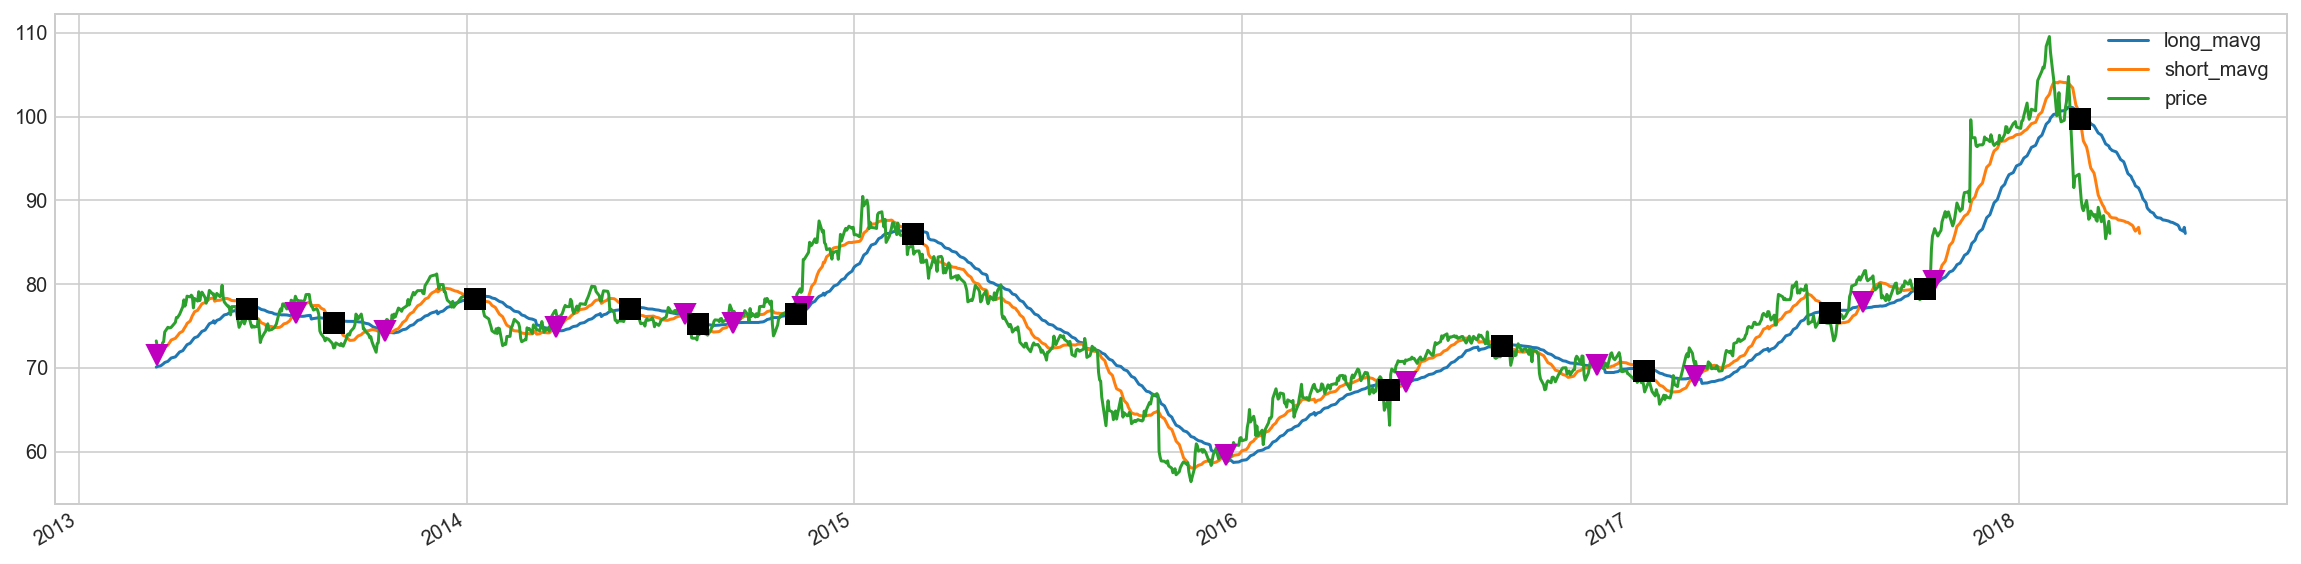

In [10]:
fig, ax = plt.subplots(figsize=(20, 5))
ax = perf.plot(y='long_mavg', ax=ax)
ax = perf.plot(y='short_mavg', ax=ax)
ax = perf.plot(y='price', ax=ax)
perf_trans = perf.loc[[t != [] for t in perf.transactions]]
buys = perf_trans.loc[[t[0]['amount'] > 0 for t in perf_trans.transactions]]
sells = perf_trans.loc[
    [t[0]['amount'] < 0 for t in perf_trans.transactions]]
ax.plot(buys.index, perf.short_mavg.loc[buys.index],
         'v', markersize=10, color='m')
ax.plot(sells.index, perf.short_mavg.loc[sells.index],
         's', markersize=10, color='k')

plt.show()

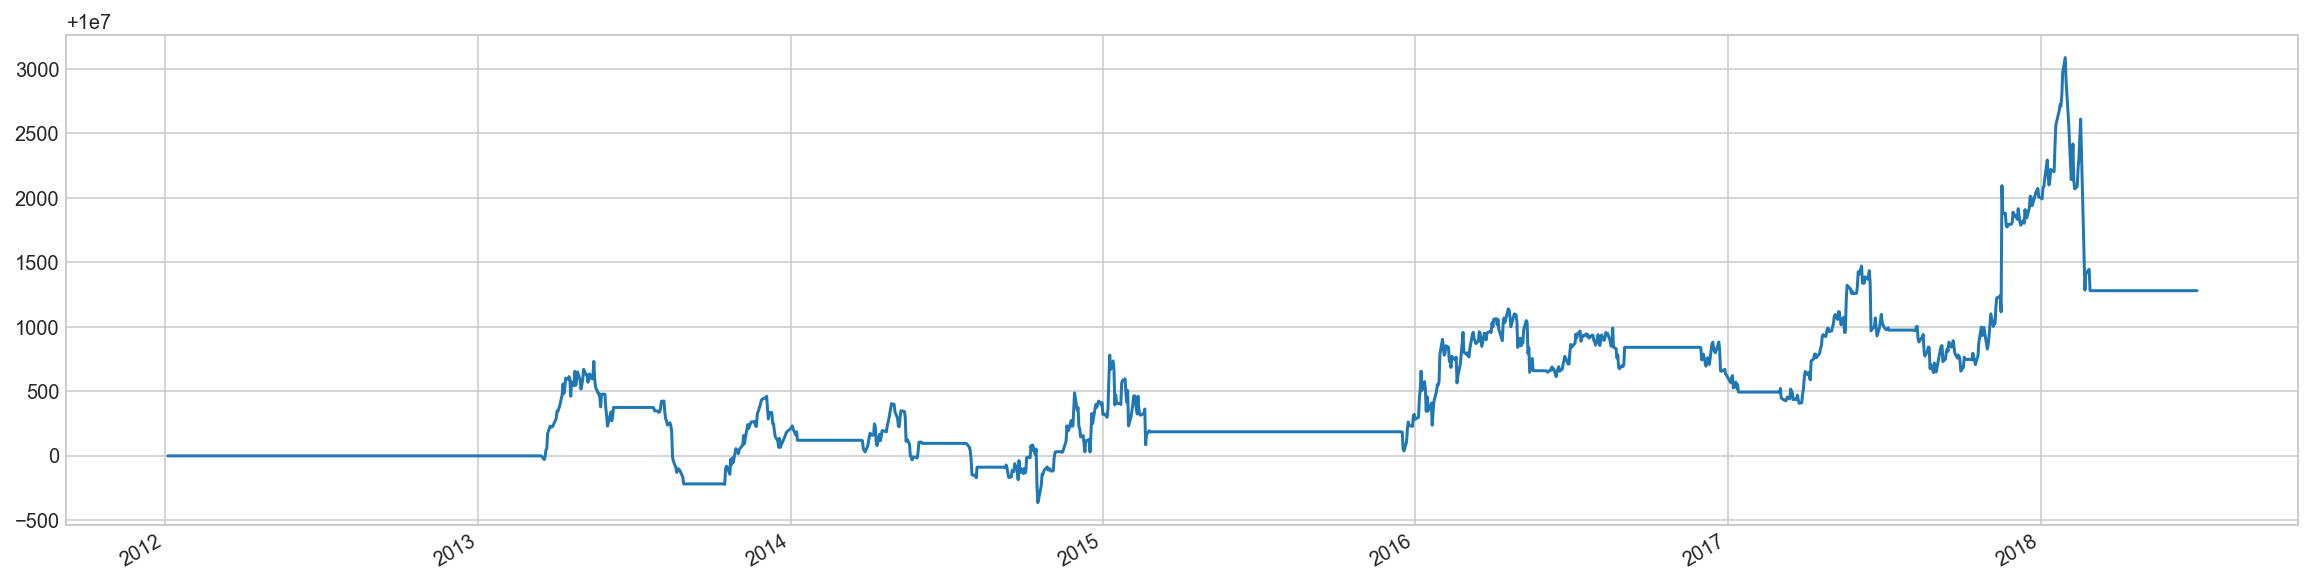

In [11]:
fig, ax = plt.subplots(figsize=(20,5))
ax = perf.portfolio_value.plot(ax=ax)
plt.show()

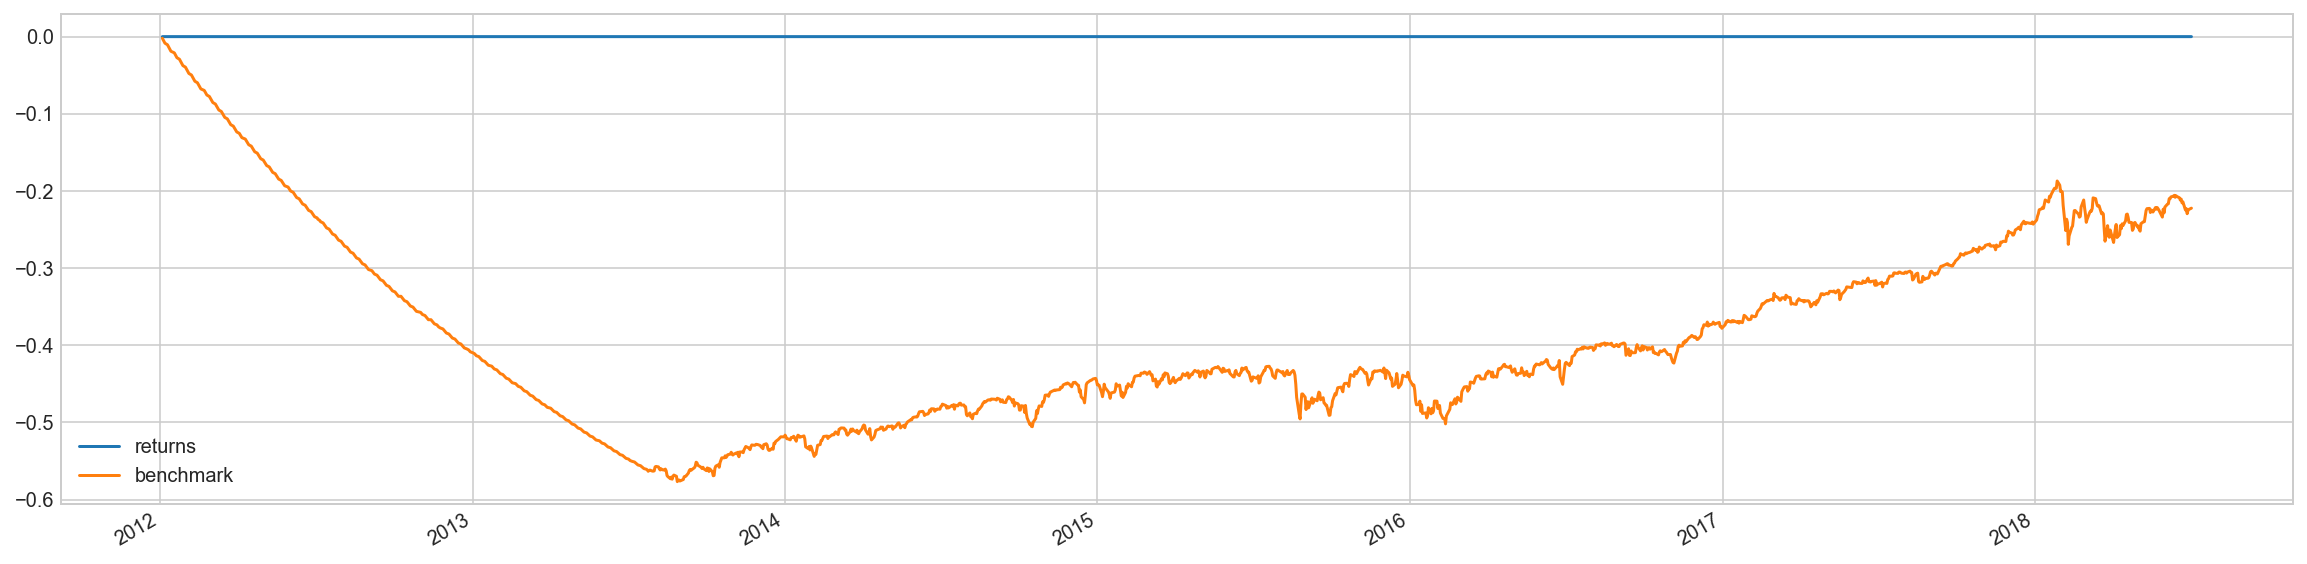

In [25]:
fig, ax = plt.subplots(figsize=(20, 5))
ax = perf.returns.plot(ax=ax, label='returns')
ax = perf.benchmark_period_return.plot(ax=ax, label='benchmark')
plt.legend(['returns', 'benchmark'])
plt.show()

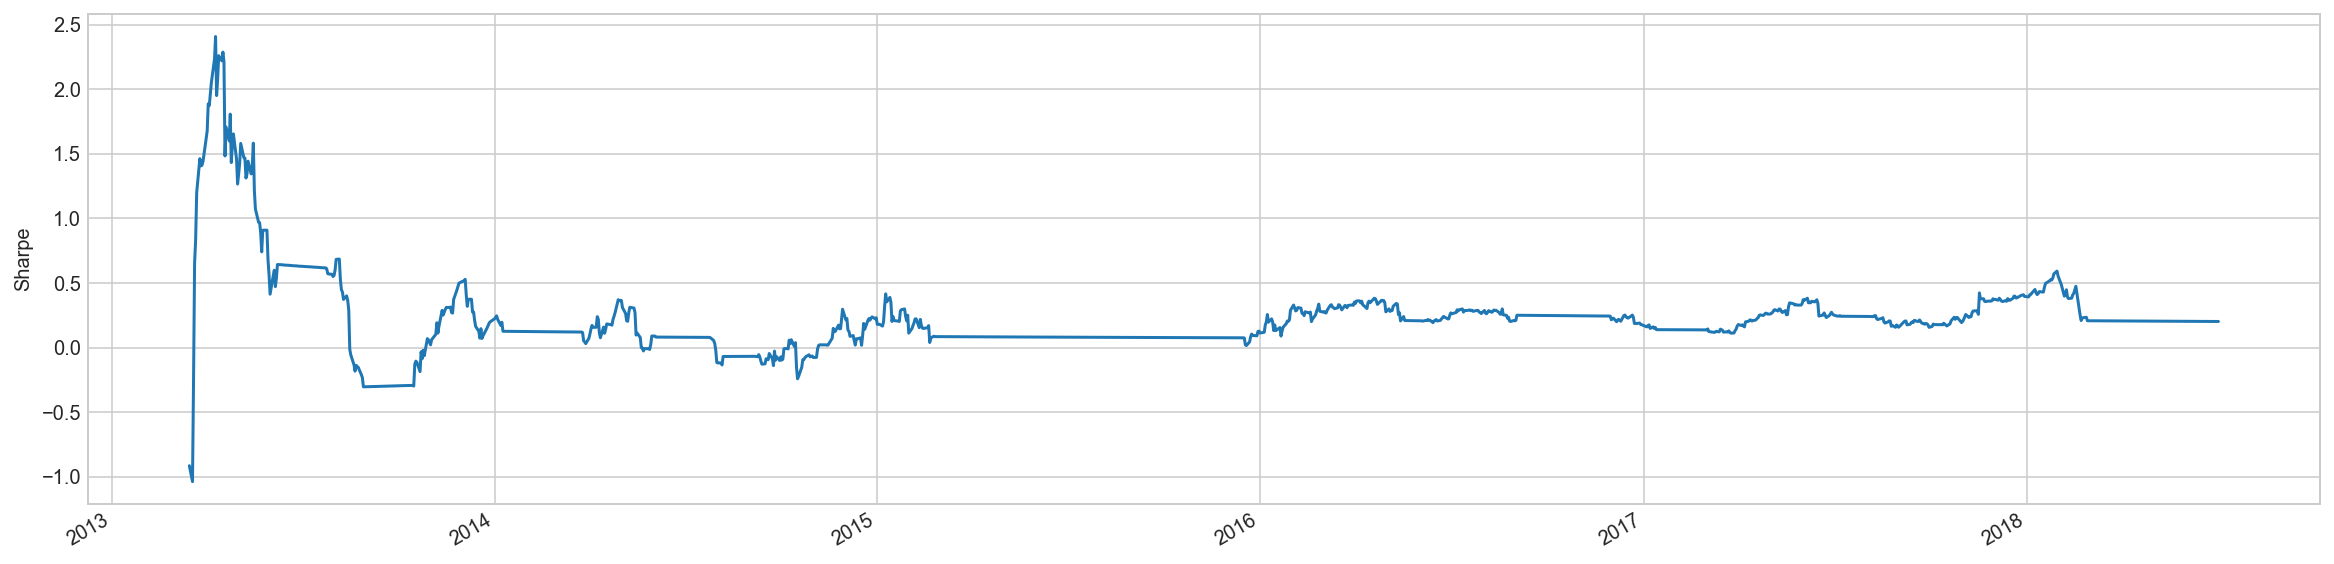

In [13]:
fig, ax = plt.subplots(figsize=(20, 5))
perf.sharpe.plot(ax=ax)
plt.ylabel('Sharpe')
plt.show()